In [1]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.8MB/s]


In [5]:
import zipfile
dataset=zipfile.ZipFile("/content/dogs-vs-cats.zip",mode='r')
dataset.extractall("/content")
dataset.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
#Generaors to read the train and test folders for cats and dogs images
train_images=tf.keras.utils.image_dataset_from_directory(
    "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)

)

test_images=tf.keras.utils.image_dataset_from_directory(
    "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#convert these images numpy values between 0 to 1(Normalize)
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_images = train_images.map(process)
test_images = test_images.map(process)

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
#Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#Fitting Model
history=model.fit(train_images,epochs=20,validation_data=test_images)

Epoch 1/20
625/625 [==============================] - 79s 102ms/step - loss: 1.8588 - accuracy: 0.5405 - val_loss: 0.7021 - val_accuracy: 0.5628
Epoch 2/20
625/625 [==============================] - 66s 105ms/step - loss: 0.6781 - accuracy: 0.5850 - val_loss: 0.6749 - val_accuracy: 0.5874
Epoch 3/20
625/625 [==============================] - 65s 102ms/step - loss: 0.6047 - accuracy: 0.6639 - val_loss: 0.5561 - val_accuracy: 0.7292
Epoch 4/20
625/625 [==============================] - 64s 102ms/step - loss: 0.5239 - accuracy: 0.7367 - val_loss: 0.5555 - val_accuracy: 0.7350
Epoch 5/20
625/625 [==============================] - 65s 104ms/step - loss: 0.5420 - accuracy: 0.7390 - val_loss: 0.5144 - val_accuracy: 0.7560
Epoch 6/20
625/625 [==============================] - 66s 105ms/step - loss: 0.4718 - accuracy: 0.7709 - val_loss: 0.4506 - val_accuracy: 0.7878
Epoch 7/20
625/625 [==============================] - 66s 106ms/step - loss: 0.4204 - accuracy: 0.8033 - val_loss: 0.6375 - val_ac

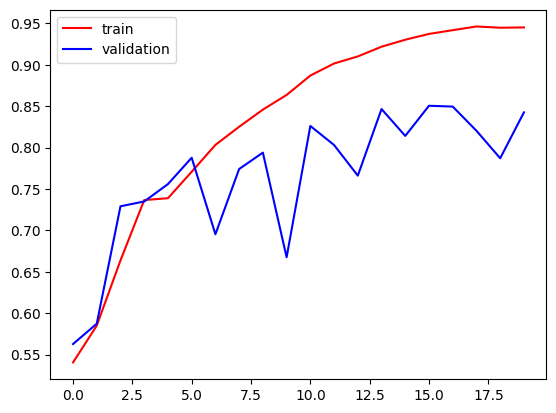

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

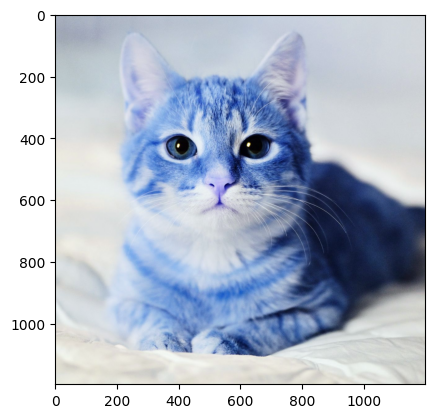

In [41]:
#Prediction with Unseen Images
import cv2
test_img = cv2.imread('/content/cat4.jpg')
plt.imshow(test_img)

In [42]:
test_img.shape

(1197, 1200, 3)

In [43]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
y_pred=model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


In [44]:
if y_pred[0][0]==0.0:
  print('Predicted - Cat')
elif y_pred[0][0]==1.0:
  print('Predicted - Dog')

Predicted - Cat


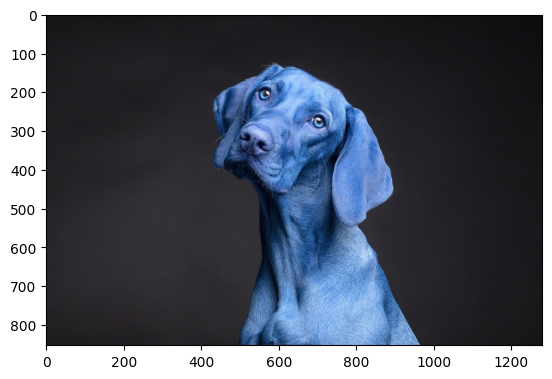

In [45]:
test_img2 = cv2.imread('/content/dog.jpg')
plt.imshow(test_img2)

In [46]:
test_img2.shape

(853, 1280, 3)

In [47]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))


In [48]:
y_pred=model.predict(test_input2)

1/1 [==============================] - 0s 24ms/step


In [49]:
if y_pred[0][0]==0.0:
  print('Predicted - Cat')
elif y_pred[0][0]==1.0:
  print('Predicted - Dog')

Predicted - Dog
